In [288]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from helpers import silver_dir

sns.set_style("darkgrid")

## Load and prepare data

In [514]:
# Load articles
articles = pl.read_ndjson(silver_dir / "sample.jsonl", ignore_errors=True)
articles

DOI,type,reference-count,is-referenced-by-count,reference,year
str,str,i64,i64,list[struct[14]],i64
"""10.29173/jaed204""","""journal-article""",0,0,null,2005
"""10.1145/191246.191249""","""proceedings-article""",0,0,null,1994
"""10.1172/jci34472ds1""","""component""",0,0,null,null
"""10.1177/003463738808500173""","""journal-article""",0,0,null,1988
"""10.1007/s00464-002-4290-6""","""journal-article""",0,12,null,2003
…,…,…,…,…,…
"""10.2307/j.ctv11smw3n.16""","""book-chapter""",0,0,null,2001
"""10.1055/s-0032-1316389""","""journal-article""",0,0,null,2012
"""10.1016/s0014-3057(96)00007-9""","""journal-article""",0,4,null,1997


In [513]:
cited_articles = articles.filter(pl.col("is-referenced-by-count") > 0)
cited_articles

DOI,type,reference-count,is-referenced-by-count,reference,year
str,str,i64,i64,list[struct[14]],i64
"""10.1007/s00464-002-4290-6""","""journal-article""",0,12,null,2003
"""10.1109/icecs.2018.8617881""","""proceedings-article""",12,1,"[{""ref4"",""publisher"",null,""10.1007/s11265-008-0305-4"",null,null,null,null,null,null,null,null,null,null}, {""ref3"",""publisher"",null,""10.1007/s10766-007-0032-7"",null,null,null,null,null,null,null,null,null,null}, … {""ref1"",""publisher"",null,""10.1109/ISSCC.2014.6757394"",null,null,null,null,null,null,null,null,null,null}]",2018
"""10.1016/j.actbio.2010.07.030""","""journal-article""",52,84,"[{""10.1016/j.actbio.2010.07.030_b0005"",""crossref"",""828"",""10.1177/039139880703000913"",""Biomaterial strategies to reduce implant-associated infections"",""30"",""2007"",""Int J Artif Organs"",null,null,""9"",""Qiu"",null,null}, {""10.1016/j.actbio.2010.07.030_b0010"",""crossref"",""83"",""10.1615/JLongTermEffMedImplants.v16.i1.90"",""Implant-associated infections: an overview"",""16"",""2006"",""J Long-Term Eff Med"",null,null,""1"",""Hedrick"",null,null}, … {""10.1016/j.actbio.2010.07.030_b0260"",""crossref"",""317"",""10.1002/mabi.200900284"",""Surface segregation assessment in poly(εcaprolactone)-poly(ethylene glycol) multiblock copolymer films"",""10"",""2010"",""Macromol Biosci"",null,null,null,""Cometa"",null,null}]",2011
"""10.1109/iembs.2011.6090345""","""proceedings-article""",7,2,"[{""3"",null,""1344"",null,""A mobile phone based telemonitoring concept for the simultaneous acquisition of biosignals and physiological parameters"",null,""2010"",""Proc 13trd World Congress on Medical and Health Informatics"",null,null,null,""kumpusch"",null,null}, {""2"",""publisher"",null,""10.1109/IEMBS.2009.5334580"",null,null,null,null,null,null,null,null,null,null}, … {""4"",""publisher"",null,""10.1109/IEMBS.2009.5333550"",null,null,null,null,null,null,null,null,null,null}]",2011
"""10.1108/ecam-06-2022-0574""","""journal-article""",77,2,"[{""key2024111405260424900_ref001"",""publisher"",""174"",""10.1016/j.tra.2018.02.011"",""Are public private partnerships that rigid? And why? Evidence from price provisions in French toll road concession contracts"",""111"",""2018"",""Transportation Research Part A: Policy and Practice"",null,null,null,null,null,null}, {""key2024111405260424900_ref002"",""publisher"",""1775"",""10.1111/j.1467-6486.2006.00658.x"",""Complexity of outsourcing contracts and ex post transaction costs: an empirical investigation"",""43"",""2006"",""Journal of Management Studies"",null,null,""8"",null,null,null}, … {""key2024111405260424900_ref077"",""publisher"",""158"",""10.1080/23812346.2018.1457297"",""The rise of public-private partnerships in China"",""3"",""2018"",""Journal of Chinese Governance"",null,null,""2"",null,null,null}]",2023
…,…,…,…,…,…
"""10.1016/s0090-8258(22)01551-7""","""journal-article""",0,1,null,2022
"""10.1080/07256868.2012.735109""","""journal-article""",54,11,"[{""CIT0001"",null,""857"",null,null,""62"",""1995"",""Social research"",null,null,null,""Abbott A."",null,null}, {""CIT0002"",""publisher"",null,""10.1177/0268580907082248"",null,null,null,null,null,null,null,null,null,null}, … {""CIT0053"",""publisher"",null,""10.1146/annurev.so.11.080185.001055"",null,null,null,null,null,null,null,null,null,null}]",2012
"""10.1111/j.1369-7625.2011.00735…","""journal-article""",21,10,"[{""e_1_2_11_2_2"",null,null,null,null,null,""1997"",null,null,""The People’s Health Service?"",null,""Barnes M"",null,null}, {""e_1_2_11_3_2"",""publisher"",null,""10.1111/1467-9515.00251"",null,null,null,null,null,null,null,null,null,null}, … {""e_1_2_11_22_2"",""publisher"",null,""10.1016/j.socscimed.2004.11.012"",null,null,null,null,null,null,null,null,null,null}]",2011


In [ ]:
# Load references and join w metadata
references = pl.read_csv(silver_dir / "references.csv").with_columns(
    pl.col("cited").str.to_lowercase()
)
ref_metadata = pl.read_ndjson(silver_dir / "ref_metadata.jsonl")

# Add type of cited article
references = references.join(ref_metadata, left_on="cited", right_on="DOI", how="left")

# Add the type of the citing article
references = references.join(
    articles.select("DOI", "type"),
    left_on="citing",
    right_on="DOI",
    how="left",
    suffix="_citing",
)

references = references.drop_nulls("cited")

references = references.with_columns(pl.col("type").fill_null("missing"))

In [535]:
references

citing,key,cited,year,published,type,type_citing
str,str,str,i64,struct[1],str,str
"""10.1016/s0025-7753(01)71961-6""","""10.1016/S0025-7753(01)71961-6_…","""10.1016/s0025-7753(00)71590-9""",2000,"{[[2000, 1]]}","""journal-article""","""journal-article"""
"""10.1016/s0025-7753(01)71961-6""","""10.1016/S0025-7753(01)71961-6_…","""10.1016/s0025-7753(00)71590-9""",2000,"{[[2000, 1]]}","""journal-article""","""journal-article"""
"""10.1016/s0025-7753(01)71961-6""","""10.1016/S0025-7753(01)71961-6_…","""10.1093/oxfordjournals.eurhear…",1991,"{[[1991, 3]]}","""journal-article""","""journal-article"""
"""10.1016/s0025-7753(01)71961-6""","""10.1016/S0025-7753(01)71961-6_…","""10.3949/ccjm.66.10.615""",1999,"{[[1999, 11, 1]]}","""journal-article""","""journal-article"""
"""10.1016/s0025-7753(01)71961-6""","""10.1016/S0025-7753(01)71961-6_…","""10.1016/0735-1097(91)90675-y""",1991,"{[[1991, 11]]}","""journal-article""","""journal-article"""
…,…,…,…,…,…,…
"""10.1016/j.socscimed.2017.11.05…","""10.1016/j.socscimed.2017.11.05…","""10.1001/jama.280.19.1690""",1998,"{[[1998, 11, 18]]}","""journal-article""","""journal-article"""
"""10.1016/j.socscimed.2017.11.05…","""10.1016/j.socscimed.2017.11.05…","""10.1111/j.1600-0447.2004.00388…",2004,"{[[2004, 9, 27]]}","""journal-article""","""journal-article"""
"""10.1016/j.socscimed.2017.11.05…","""10.1016/j.socscimed.2017.11.05…","""10.1017/s0033291709990808""",2010,"{[[2009, 8, 6]]}","""journal-article""","""journal-article"""


## Basic stats

In [84]:
articles.describe()

statistic,DOI,type,reference-count,is-referenced-by-count,reference,year
str,str,str,f64,f64,f64,f64
"""count""","""10000""","""10000""",9989.0,9989.0,4367.0,9343.0
"""null_count""","""0""","""0""",11.0,11.0,5633.0,657.0
"""mean""",null,null,14.817099,10.928621,null,2004.63866
"""std""",null,null,38.815895,64.744455,null,24.379893
"""min""","""10.1001/archderm.134.8.1025""","""book""",0.0,0.0,null,1765.0
"""25%""",null,null,0.0,0.0,null,1999.0
"""50%""",null,null,0.0,0.0,null,2013.0
"""75%""",null,null,21.0,5.0,null,2020.0
"""max""","""10.9790/487x-16841120""","""standard""",2413.0,4166.0,null,2025.0


In [538]:
references.get_column("citing").n_unique()

4116

In [539]:
references.get_column("cited").n_unique()

105429

## Which content types are being cited in the scholarly literature?

In [542]:
CONTENT_TYPES = {
    "journal-article": 112566280,
    "book-chapter": 22804154,
    "proceedings-article": 8948336,
    "component": 8461215,
    "dataset": 3102257,
    "posted-content": 2268035,
    "other": 1553331,
    "journal-issue": 1302629,
    "entry": 898376,
    "book": 844744,
    "report": 811010,
    "monograph": 724847,
    "dissertation": 717013,
    "peer-review": 716562,
    "edited-book": 411897,
    "standard": 397750,
    "reference": 221126,
    "grant": 135707,
    "proceedings": 74606,
    "journal": 70896,
    "report-component": 68066,
    "section": 49620,
    "database": 31171,
    "part": 25130,
    "journal-volume": 12291,
    "report-series": 7504,
    "book-series": 3392,
    "book-set": 564,
    "proceedings-series": 344,
    "track": 52,
    "missing": 0,
}
cr_types_sum = sum(CONTENT_TYPES.values())
cr_types = (
    pl.DataFrame(CONTENT_TYPES)
    .transpose(include_header=True, header_name="type", column_names=["count"])
    .with_columns(proportion=pl.col("count") / cr_types_sum)
)

In [ ]:
n_articles = articles.shape[0]
n_cited_articles = cited_articles.shape[0]
n_refs = references.shape[0]

label_articles = f"All Articles (n={n_articles:,.0f})"
label_cited_articles = f"Cited Articles (n={n_cited_articles:,.0f})"
label_refs = f"References (n={n_refs:,.0f})"
label_cr = f"Crossref (n={cr_types_sum:,.0f})"

type_dists = cr_types.select("type", "proportion").rename({"proportion": label_cr})

type_dists = type_dists.join(
    articles.get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_articles}),
    on="type",
    how="left",
)

type_dists = type_dists.join(
    cited_articles.get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_cited_articles}),
    on="type",
    how="left",
)

type_dists = type_dists.join(
    references.get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_refs}),
    on="type",
    how="left",
)

df = type_dists.sort(label_cr, descending=True)

cols = df.head(15).get_column("type").to_list() + ["missing"]

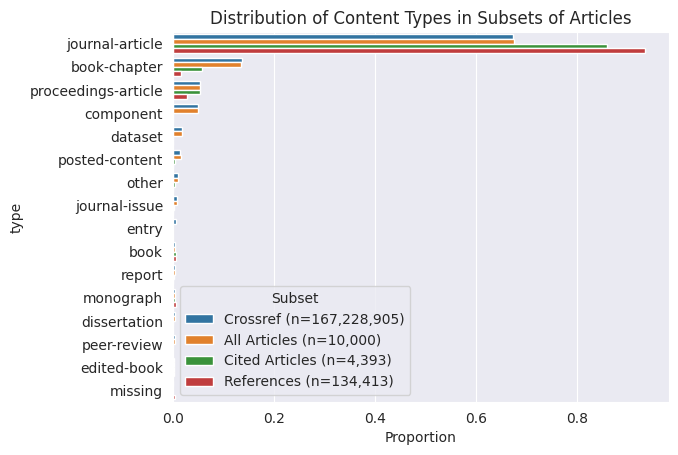

In [544]:
pdf = df.filter(pl.col("type").is_in(cols)).unpivot(
    index="type", variable_name="Subset", value_name="Proportion"
)
sns.barplot(pdf, x="Proportion", y="type", hue="Subset")
plt.title("Distribution of Content Types in Subsets of Articles");

# plt.xscale("log")

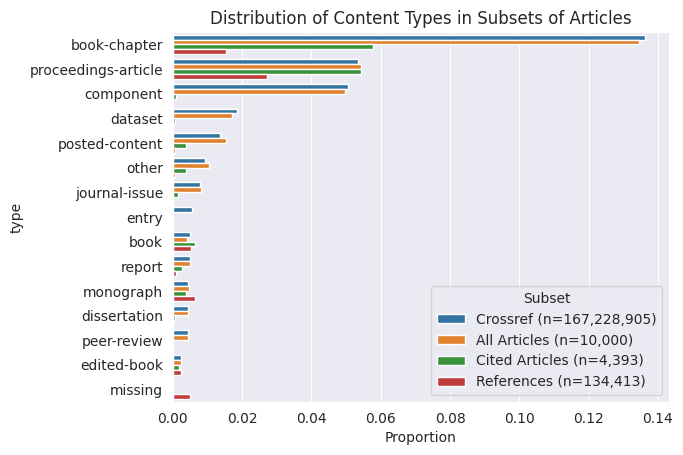

In [545]:
pdf = df.unpivot(index="type", variable_name="Subset", value_name="Proportion")
pdf = pdf.filter(pl.col("type") != "journal-article")
pdf = pdf.filter(pl.col("type").is_in(cols))
sns.barplot(pdf, x="Proportion", y="type", hue="Subset")
plt.title("Distribution of Content Types in Subsets of Articles");
# plt.xscale("log")

Cited Articles in the sample stand out:

- Higher proportion of journal-article
- Missing proceedings-article

Possible variables to explore:

- Disciplinary biases
- 

## How is that changing over time?

In [546]:
low_lim = 2005
up_lim = 2018

Text(0.5, 1.0, 'Publication Years of References')

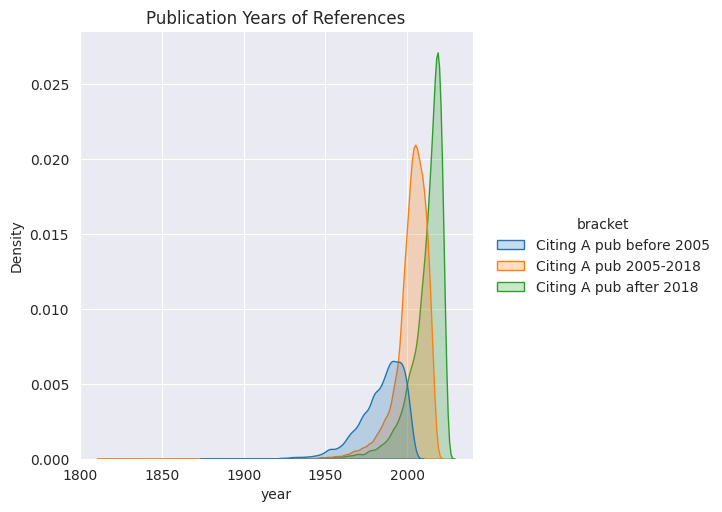

In [547]:
art_brackets = articles.select(pl.col("DOI").alias("citing"), "year").with_columns(
    pl.when(pl.col("year") < low_lim)
    .then(pl.lit(f"Citing A pub before {low_lim}"))
    .when(pl.col("year").is_between(low_lim, up_lim))
    .then(pl.lit(f"Citing A pub {low_lim}-{up_lim}"))
    .when(pl.col("year") > up_lim)
    .then(pl.lit(f"Citing A pub after {up_lim}"))
    .alias("bracket")
)
art_brackets

refs = references.join(
    art_brackets.select("citing", "bracket"), on="citing", how="left"
)
df = refs.select("year", "bracket")

sns.displot(df, x="year", hue="bracket", kind="kde", fill=True)
plt.title("Publication Years of References")

In [548]:
low_lim = 2005
up_lim = 2018
df1 = articles.filter(pl.col("year") < low_lim)
df2 = articles.filter(pl.col("year").is_between(low_lim, up_lim))
df3 = articles.filter(pl.col("year") > up_lim)

n_df1 = df1.shape[0]
n_df2 = df2.shape[0]
n_df3 = df3.shape[0]

label_articles = f"Published before {low_lim} (n={n_df1:,.0f})"
label_cited_articles = f"Published between {low_lim} and {up_lim} (n={n_df2:,.0f})"
label_refs = f"Published after {up_lim} (n={n_df3:,.0f})"

type_dists = (
    references.filter(pl.col("citing").is_in(df1.get_column("DOI")))
    .get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_articles})
)

type_dists = type_dists.join(
    references.filter(pl.col("citing").is_in(df2.get_column("DOI")))
    .get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_cited_articles}),
    on="type",
    how="left",
)

type_dists = type_dists.join(
    references.filter(pl.col("citing").is_in(df3.get_column("DOI")))
    .get_column("type")
    .value_counts(normalize=True)
    .rename({"proportion": label_refs}),
    on="type",
    how="left",
)

df = type_dists.sort(label_articles, descending=True)

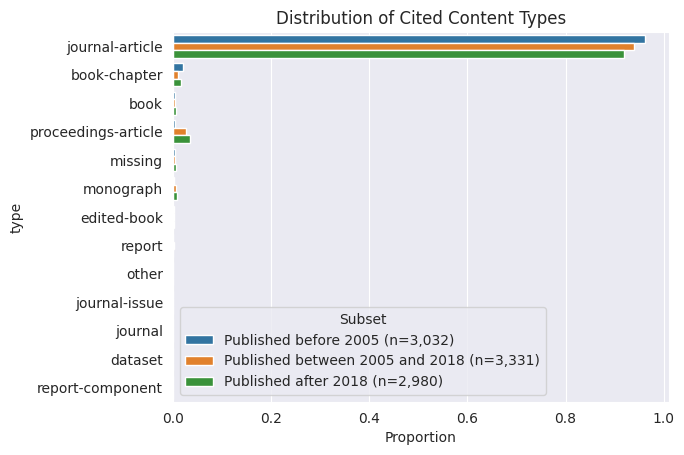

In [549]:
pdf = df.unpivot(index="type", variable_name="Subset", value_name="Proportion")
sns.barplot(pdf, x="Proportion", y="type", hue="Subset")
plt.title("Distribution of Cited Content Types");

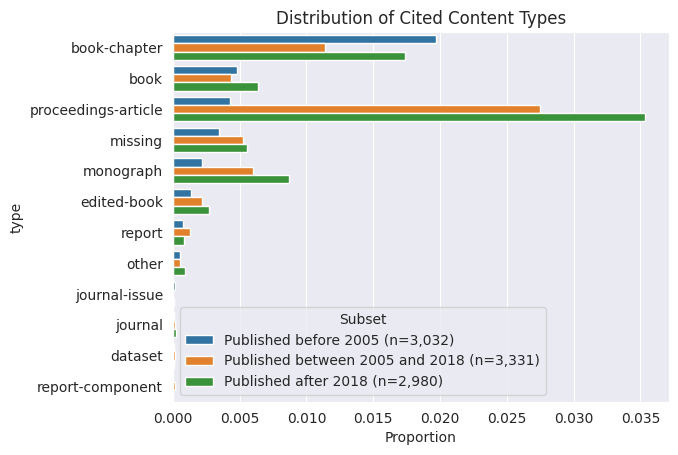

In [551]:
pdf = df.unpivot(index="type", variable_name="Subset", value_name="Proportion")
pdf = pdf.filter(pl.col("type") != "journal-article")
sns.barplot(pdf, x="Proportion", y="type", hue="Subset")
plt.title("Distribution of Cited Content Types");

## Are there any correlations between the content type of the citing work and the content type of the cited work?

In [552]:
df = (
    references.select("cited", "citing", "type", "type_citing")
    .group_by(["type", "type_citing"])
    .agg(pl.col("cited").count().alias("n_refs"))
    .sort("n_refs", descending=True)
)

df = df.pivot(index="type", on="type_citing", values="n_refs")
pdf = df.to_pandas().set_index("type")

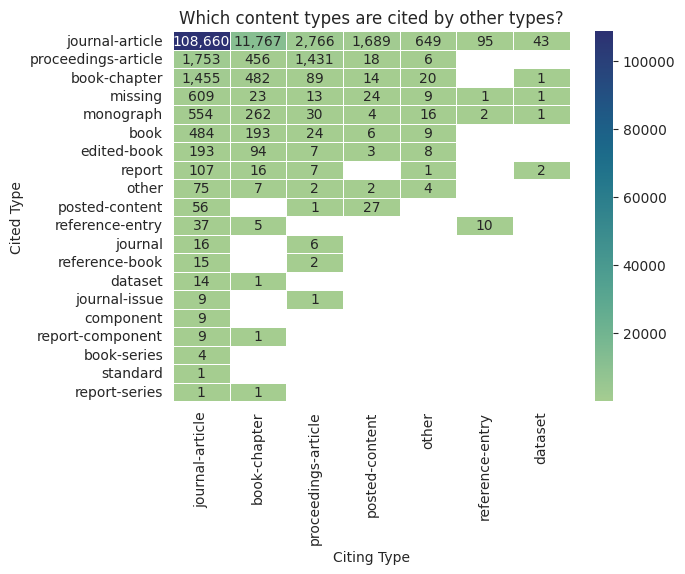

In [553]:
sns.set_style("white")
sns.heatmap(pdf, annot=True, fmt=",.0f", cmap="crest", linewidth=0.5)
plt.title("Which content types are cited by other types?")
plt.xlabel("Citing Type")
plt.ylabel("Cited Type");

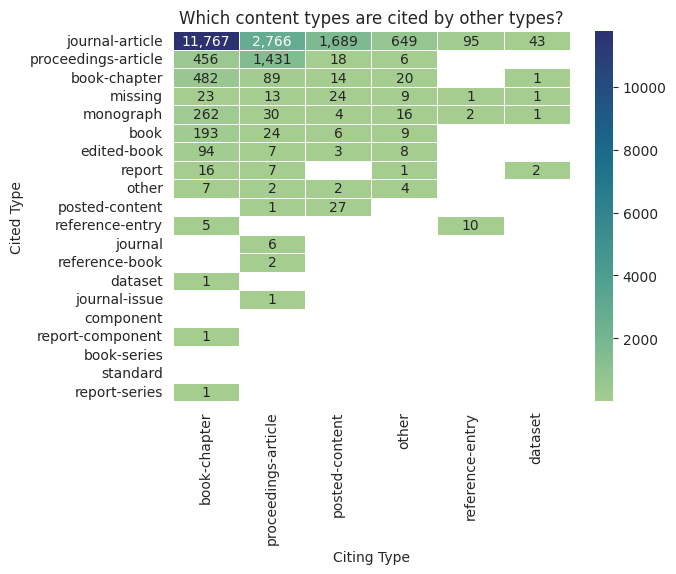

In [554]:
sns.set_style("white")
sns.heatmap(
    pdf.drop("journal-article", axis=1),
    annot=True,
    fmt=",.0f",
    cmap="crest",
    linewidth=0.5,
)
plt.title("Which content types are cited by other types?")
plt.xlabel("Citing Type")
plt.ylabel("Cited Type");

### Citation Counts

In [ ]:
articles.group_by("type").agg(
    pl.col("is-referenced-by-count").sum().alias("citations_sum"),
    pl.col("is-referenced-by-count").mean().alias("citations_mean"),
    pl.col("is-referenced-by-count").median().alias("citations_median"),
).sort("citations_sum", descending=True)

type,citations_sum,citations_mean,citations_median
str,i64,f64,f64
"""journal-article""",103337,15.320534,1.0
"""proceedings-article""",1965,3.618785,0.0
"""book-chapter""",1788,1.32838,0.0
"""book""",1071,26.775,2.0
"""journal""",616,205.333333,34.0
…,…,…,…
"""book-part""",0,0.0,0.0
"""grant""",0,null,null
"""reference-book""",0,0.0,0.0


In [ ]:
sorted_citations = (
    articles.group_by("type")
    .agg(pl.col("is-referenced-by-count").sum().alias("citations_sum"))
    .sort("citations_sum", descending=True)
)

df = articles.select("type", "is-referenced-by-count")

df = df.join(sorted_citations, on="type").sort("citations_sum", descending=True)

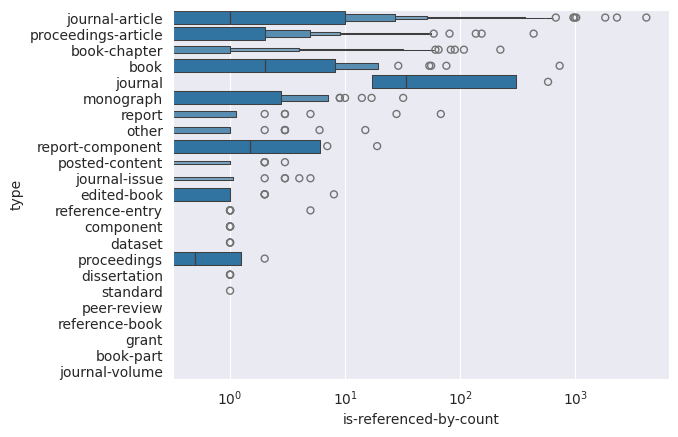

In [ ]:
ax = sns.boxenplot(data=df, y="type", x="is-referenced-by-count")
# plt.xlim(-10, 10000)
plt.xscale("log")